## Proyecto de ML para predecir la calidad del vino

**Autor:** Francisco Canet

In [117]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
from scipy import stats

## 1. Contexto
Portugal es uno de los 10 mayores exportadores de vino en el mundo. Especificamente, las exportaciones de *vinho verde* (propio de la region norte-occidental) ha crecido mucho en los ultimos años, llegando a representar en el 2019 el 50% de las exportaciones. El vinho verde es único de la region de Minho, es medio en alcohol y es apreciado principalmente por su frescura. 

Para seguir con este crecimiento, la industria del vino ha invertido en nueva tecnologia para la elaboracion y venta de vino. La certificación de los vino y la evaluación de calidad son importantes dentro de este contexto. La evaluación de la calidad es generalmente parte del proceso de certificación y puede ser utilizada para mejorar el proceso de elaboración, al identificar los factores más importantes para hacer un buen vino, y tambien para estratificar a los vino en marcas premium, útil para fijar precios.

Durante la certificación se miden variables fisicoquímicas y se realizan pruebas sensoriales. En el laboratorio se miden variables fisicoquímicas de rutina como la densidad, alcohol, pH, etc., por otro lado las pruebas sensoriales se realizan por catadores expertos. Es importante resaltar que el gusto es el sentido humano menos entendido, por lo que la clasificacion del vino puede ser una tarea difícil. Además, las relaciones entre las variables fisicoquímicas y los análisis sensoriales son complejas y no se entienden completamente.

Para facilitar el proceso de clasificación de los vinos, desarrollaremos un modelo de Machine Learning (ML) para predecir la calidad del vino en función de distintas variables fisicoquímicas. Analizaremos un set de datos de la variedad más comun de vihno verde, el de tipo blanco. Este set de datos contiene mediciones de 11 variables fisicoquímicos (% alcohol, densidad, acidez, etc.) y calificaciones de evaluaciones sensoriales en un puntaje del 1-10.

Fuente de los datos [aquí](http://www3.dsi.uminho.pt/pcortez/wine/)

Para más información acerca de este sets de datos, te dejo el enlace a la publicacíon original [aquí](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub)

In [118]:
#Leemos el archivo con los datos
white_original = pd.read_csv("Data\winequality-white.csv", sep= ";")

## Variable de respuesta

- quality (numeric, int) = calificacion sensorial del vino, escala del 1 (muy malo) al 10 (excelente). El valor representa la mediana de la calificacion otorgada por 3 evaluadores.

## Variables independientes
Son propiedades fisicoquímicas medidas durante el proceso de certificación del vino.
Solo se muestras las mediciones más comunes.
Los datos se reportan en función de dm3, que es equivalente a 1 litro (L)

- fixed acidity (float), medida como g(acido tartarico)/L: Aporta acidez, caracteristica fundamental del sabor del vino.  Los acidos influencian el pH, el sabor, estabilidad y tiempo de vida (lifespan). 
- volatile acidity (float), medida como g(acido acético)/L: Medida de los acidos en forma gaseosa. Medida compuesta principalmente por acido acético, pero tambien por acido lactico, formico, butirico y propionico. El acido acetico es el que aporta el sabor y aroma vinagre, indicacion de que el vino se esta poniendo malo. Aunque algunos fabricantes buscan tener cantidades muy pequeñas de acido acetico para dar un sabor más complejo al vino. 

- citric acid (float), (g/L): Aporta acidez. El acido citrico se encuentra naturalmente en muy pocas cantidades. Se añade al vino para darle un sabor más fresco y estabilizar el vino (evitar quiebra férrica). En la EU solo se añade para estabilizar al vino. En mucha cantidad puede provocar inestabilidad microbiologica, ya que puede provocar el crecimiento de microorganismos indeseados. 

- residual sugar (float), (g/L): restos de azucar natural procedentes de la uva que no fueron fermentados durante la elaboración del vino. Aporta el sabor dulce al vino. 

- chlorides (float), g(cloruro de sodio)/L: Mineral que otorga sabor salado al vino. 

- free sulfur dioxide (float), (mg/L): Forma activa del dioxido de azufre que protege al vino de la oxidación y el deterioro (spoilage). En esta forma el dioxido de azufre no esta unido a otras especies químicas. Demasiado dioxido de azufre libre puede enmascarar los aromas frutales del vino y darle un sabor amargo/metalico. 

- total sulfur dioxide (float), (mg/L): Es la cantidad de dioxido de azufre en forma libre más la cantidad que ha reaccionado con otros químicos en el vino (pigmentos, aldheidos o azucares), su cantidad esta regulada. 

- density (float), (g/L): Densidad del vino. Relacionada con el contenido de azucares y de alcohol. 

- pH (float): Una medida de la acidez del vino. Relacionado con la fuerza de los acidos presentes. El pH del vino varia entre 2.8 y 4. El pH esta relacionado con el aroma y frescura del vino.

- sulphates (float), g(sulfato de potasio/L): El sulfato de potasio es un fertilizando utilizando en el cultivo de la vid. Ayuda a la formación de azucares dentro de la uva. 

- alcohol (float), (vol%): Se relaciona con diferentes sensaciones como sensación de ardor o calor en el paladar, viscosidad física y percibida y equilibrio entre acidez y dulzura. 

## 1. Business case & Data Collection
1. **Business understanding**: Entender cuales son las variables fisicoquímicas del vinho verde (blanco) que más influyen para que sea de buena calidad. 

2. **Hipótesis**: ¿Es posible predecir la calidad del vino en función varios parametros fisicoquímicos?

3. **Requerimientos de los datos**: Usaremos datos recopilados de vihno verde que fueron evaluados por la agencia de certificacion oficial (CVRVV) entre Mayo 2004 hasta Febrero 2007.

4. **Disponibilidad**: No es una fuente de datos recurrente. Solo disponemos de 1 archivo.

5. **Adquisición de datos**: Accedemos a traves de lectura de un csv.

6. **Calidad**: Buena calidad, no hay missing data

## 2. Data Understanding

In [119]:
white_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [120]:
white_original.shape
# Hay 4898 muestras de vino, 12 columnas: quality es la variable dependiente, las 11 restantes son las variables que usaremos para predecir la calidad

(4898, 12)

In [121]:
#Comprobamos los tipos de datos de los dataframes
display(white_original.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [122]:
# No hay null
white_original.isnull().sum()

white_original.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No hay missing data en el dataframe

In [123]:
#Hay algunos nombres de columnas que tienen espacios, mejor cambiarlos por _

white_original.columns = white_original.columns.str.replace(" ", "_")

white_original.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [124]:
white_original["quality"].value_counts()

# Es un data set desbalanceado. Solo hay cinco vinos con calificacion de 9 y veinte con calificación 3

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [125]:
white_original["quality"].value_counts(normalize= True)

# Lo mismo que antes pero se muestra el resultado en porcentaje

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

In [126]:
#Eliminamos las muestras de vino con calificacion 3 o 9, son muy pocos ejemplos para que el modelo de ML pueda aprender a clasificarlos correctamente

white = white_original.copy()

white = white[(white["quality"] != 3) & (white["quality"] != 9)]

## 3. Analisis de los datos

### 1. Dividimos en Train y Test

In [127]:
x = white.copy()

y = x.pop("quality")

In [128]:
# Dividimos el dataframe en test y train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify= y)

### 2. EDA

### Exploratorio inicial: Variable dependiente

La variable de respuesta es de tipo numerica

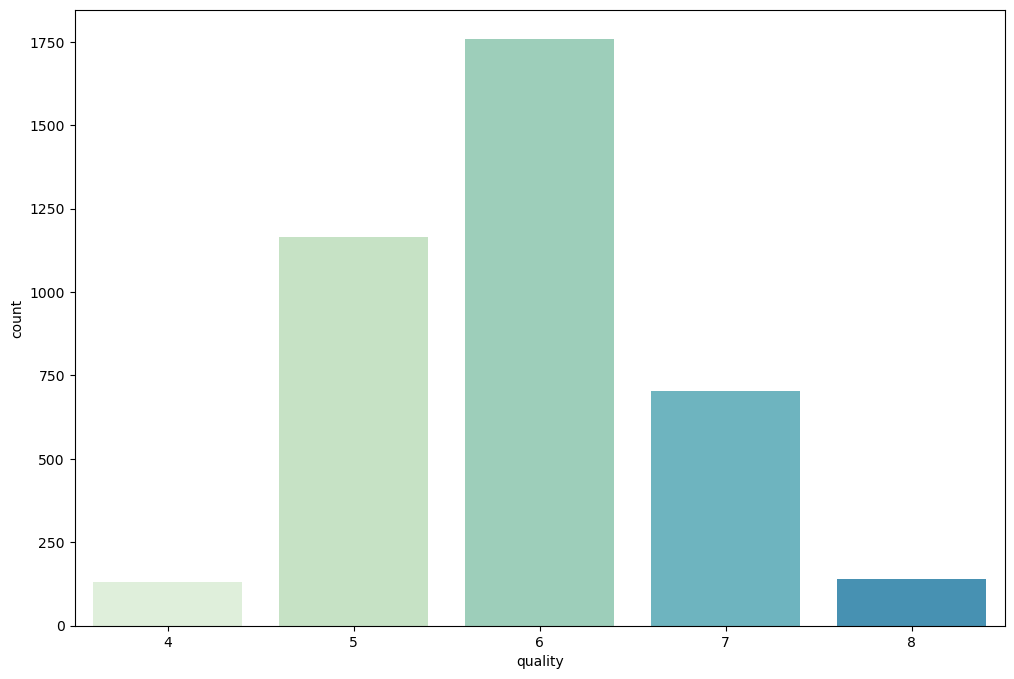

In [129]:
sns.countplot(x = y_train, palette= sns.color_palette("GnBu"));

# La frecuencia de las calificaciones sigue la forma de una distribucion normal

In [130]:
# Vamos a ver la correlación entre la variable de respuesta y las variables dependientes
pd.concat([x_train, y_train], axis= 1).corr().loc['quality']

# Las variables volatile acidity, cloruros, densidad y alcohol son las que más se relacionan con la calidad del vino

fixed_acidity          -0.109926
volatile_acidity       -0.203420
citric_acid            -0.014553
residual_sugar         -0.104184
chlorides              -0.212697
free_sulfur_dioxide     0.028467
total_sulfur_dioxide   -0.175099
density                -0.320376
pH                      0.103339
sulphates               0.057820
alcohol                 0.446670
quality                 1.000000
Name: quality, dtype: float64

### Exploratorio inicial: Variables independientes

Todas las variables (independientes) son numericas.

En base a lo que he leido y a la hipotesis planteadas se pueden crear nuevas variables: 

- ratio_acidity (float) = citric acid / fixed acidity: Añadir demasiado ácido cítrico puede favorecer el crecimiento de microorganismos indeseados, por eso comparo la proporcion de acidez fija y la de acido cítrico.

- ratio_sulfur (float) = free sulfur/total sulfur: Si hay mucho total sulfur en relacion al free sulfur es que se ha inyectado dioxido de azufre varias veces, esto no es lo ideal. 

In [131]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2141,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.60
105,7.3,0.130,0.32,14.4,0.051,34.0,109.0,0.99740,3.20,0.35,9.20
2258,7.6,0.480,0.28,10.4,0.049,57.0,205.0,0.99748,3.24,0.45,9.30
429,7.1,0.310,0.47,13.6,0.056,54.0,197.0,0.99780,3.10,0.49,9.30
4733,5.2,0.185,0.22,1.0,0.030,47.0,123.0,0.99218,3.55,0.44,10.15


In [132]:
#Creamos columnas con nuevas variables

# train
x_train["ratio_acidity"] = x_train["citric_acid"]/x_train["fixed_acidity"]
x_train["ratio_sulfur"] = x_train["free_sulfur_dioxide"]/x_train["total_sulfur_dioxide"]

#test
x_test["ratio_acidity"] = x_test["citric_acid"]/x_test["fixed_acidity"]
x_test["ratio_sulfur"] = x_test["free_sulfur_dioxide"]/x_test["total_sulfur_dioxide"]

x_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,ratio_acidity,ratio_sulfur
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,6.857016,0.278032,0.334903,6.420408,0.045522,35.115316,138.215495,0.994035,3.186688,0.488930,10.508071,0.048908,0.254641
std,0.831714,0.099015,0.121890,4.991645,0.020971,16.275072,41.724866,0.002917,0.149790,0.114457,1.230097,0.017209,0.093314
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.220000,8.000000,0.000000,0.023622
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.080000,0.410000,9.500000,0.038961,0.190247
50%,6.800000,0.260000,0.320000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.046377,0.252406
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.055714,0.314607
max,14.200000,1.005000,1.660000,31.600000,0.346000,128.000000,344.000000,1.010300,3.820000,1.080000,14.200000,0.224324,0.710526


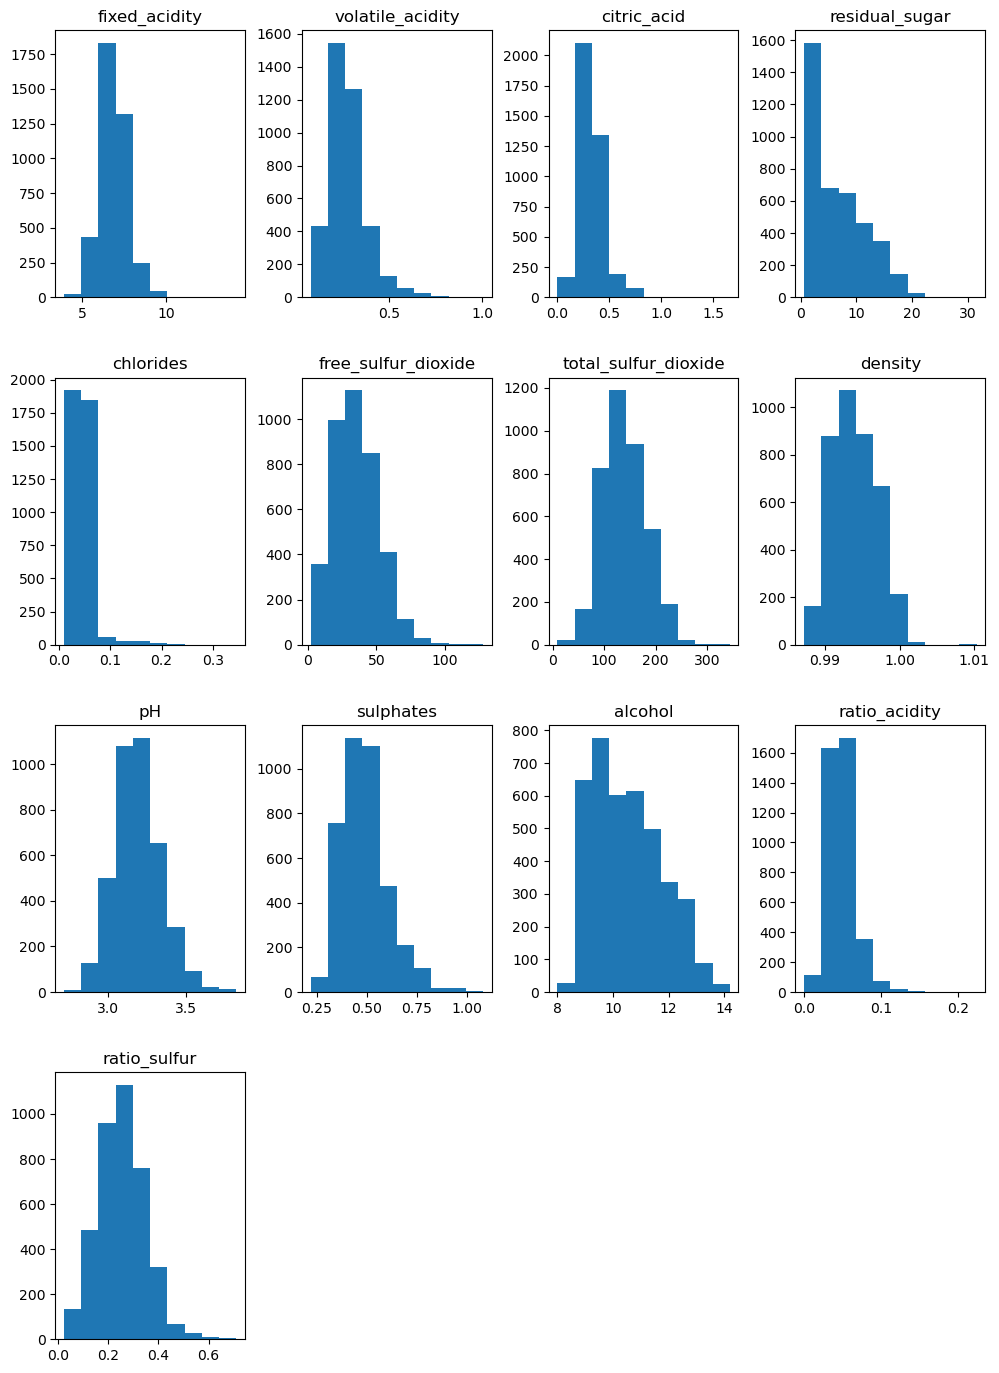

In [133]:
# Graficamos un histograma de cada feature
x_train.hist(grid = False,figsize= (12,17));

- Todas las variables parecen ser leptocurticas
- Todas las variables parecen tener sesgo positivo, excepto pH que parece simétrica.

### Limpieza de datos

<AxesSubplot: ylabel='chlorides'>

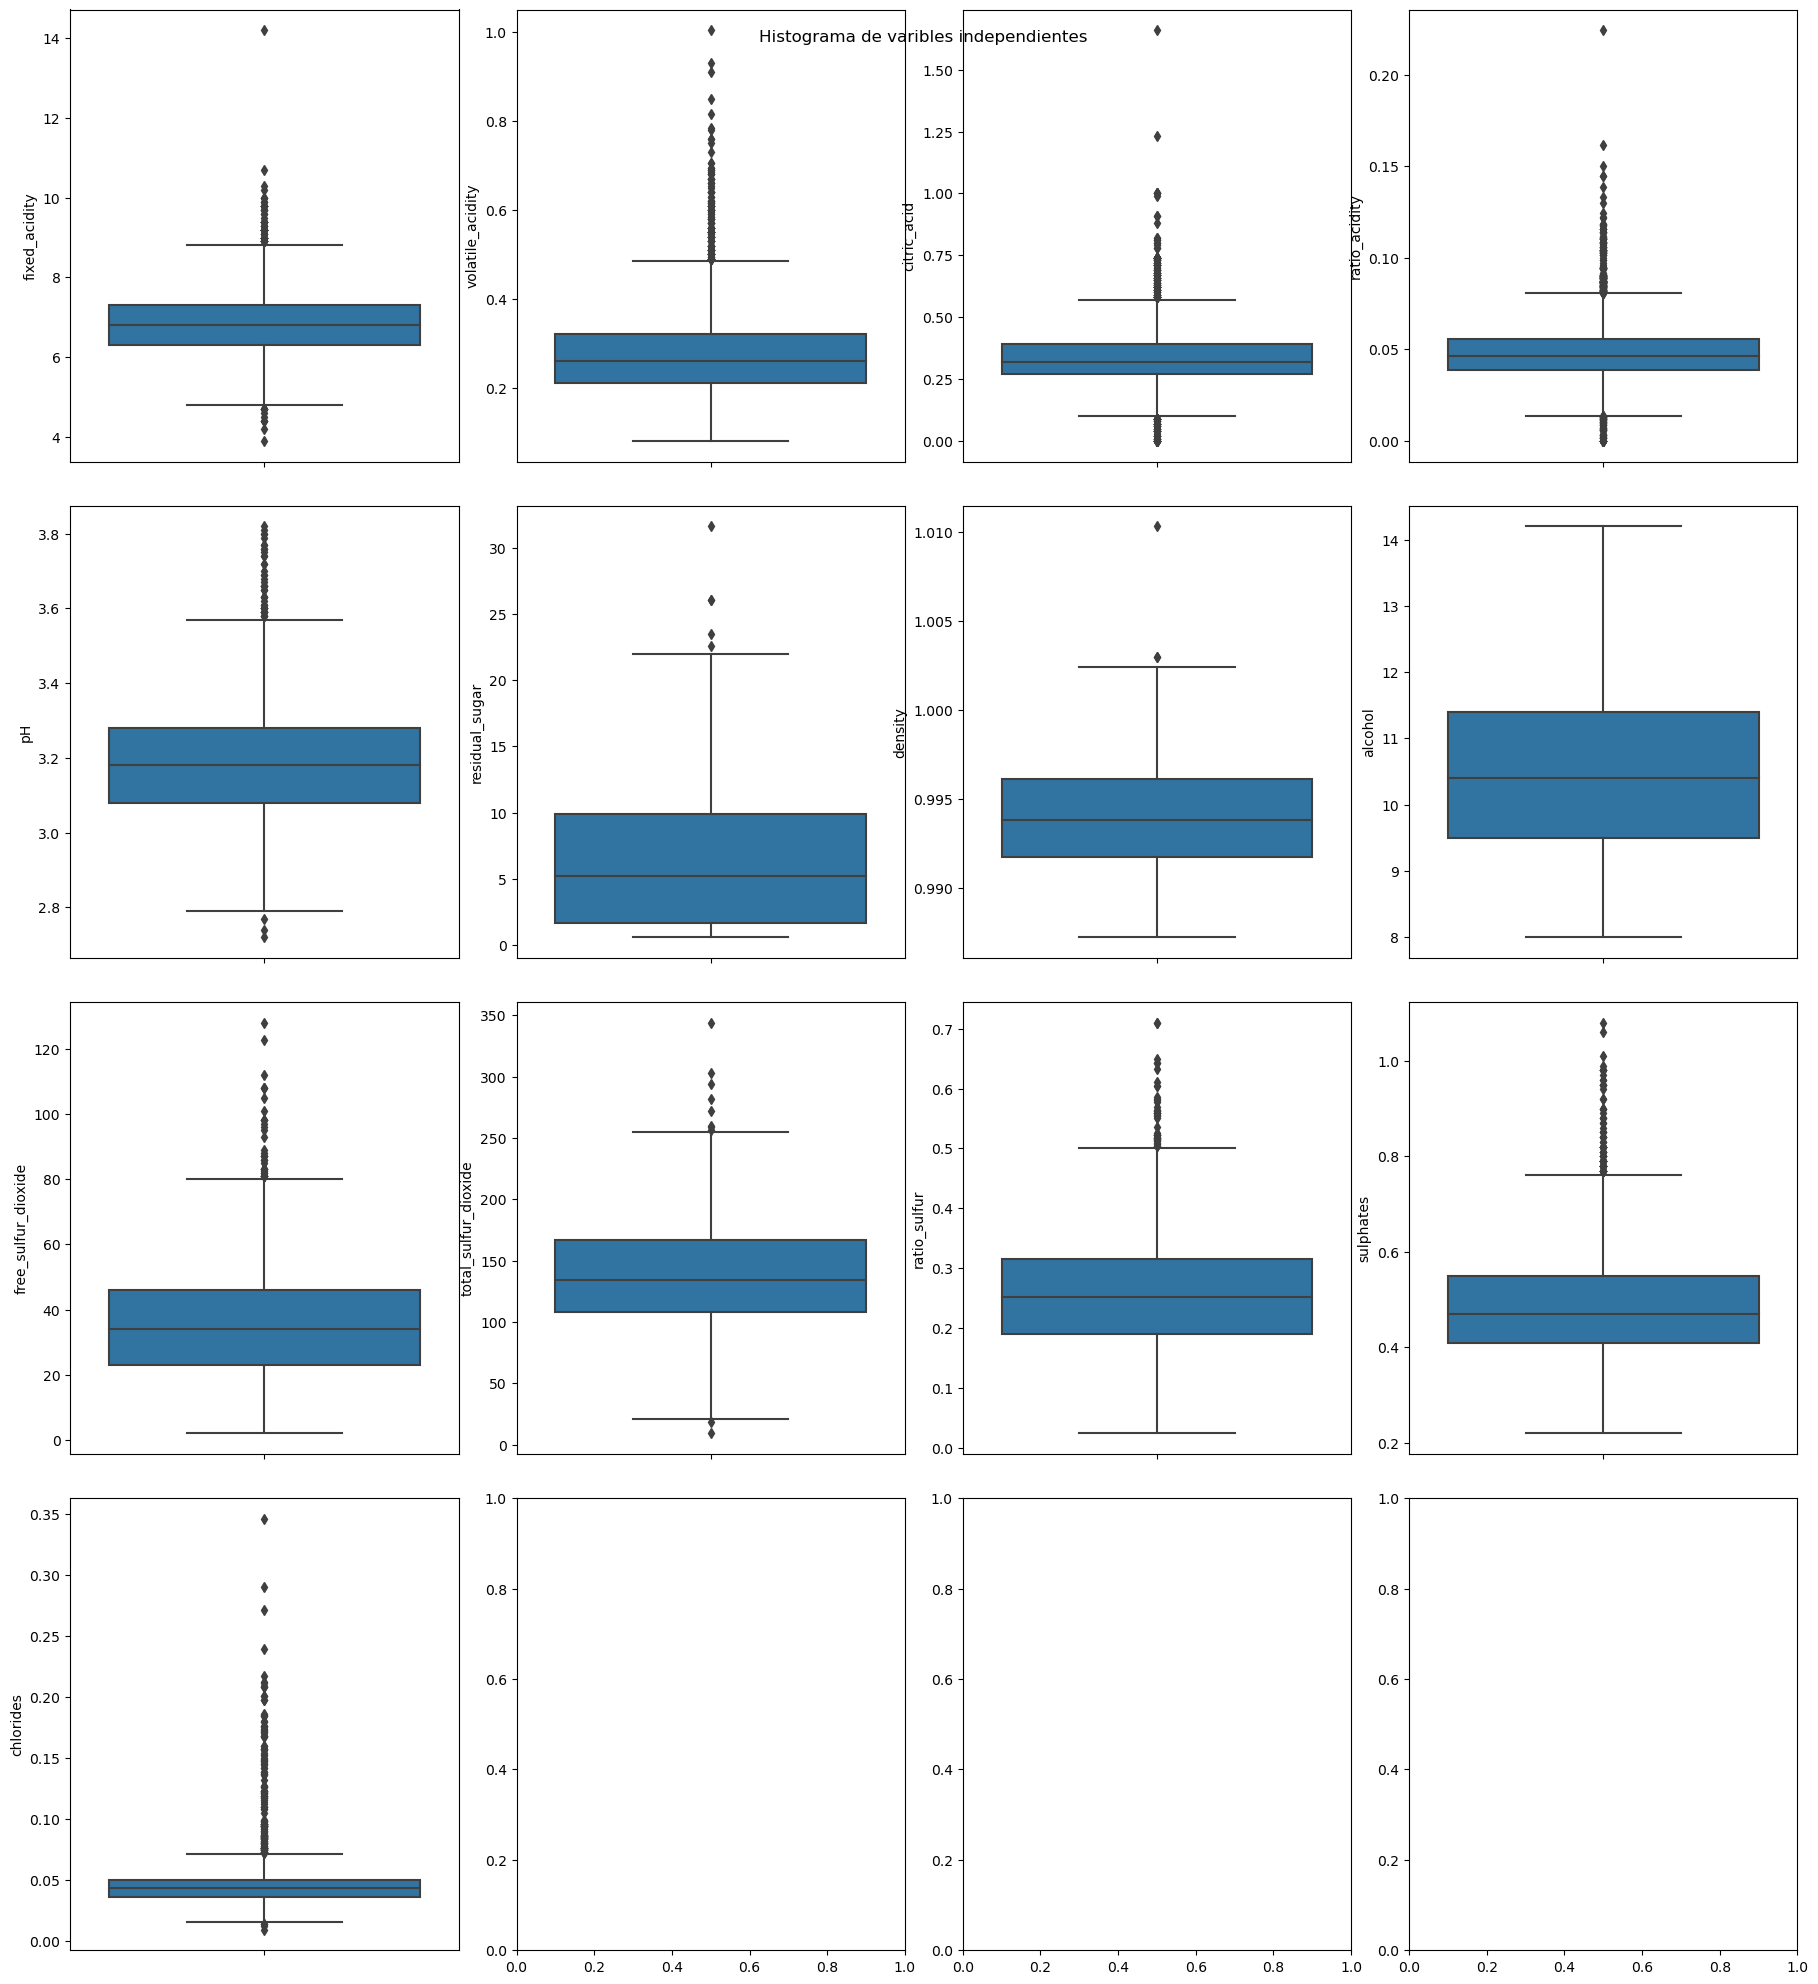

In [134]:
# Vamos a hacer un boxplot de cada feature para ver posibles outliers

fig, axes = plt.subplots(nrows = 4,ncols = 4, figsize = (18, 20))
plt.tight_layout()
fig.suptitle("Histograma de varibles independientes")

sns.boxplot(ax = axes[0,0], data = x_train, y = 'fixed_acidity')
sns.boxplot(ax = axes[0,1], data = x_train, y = 'volatile_acidity')
sns.boxplot(ax = axes[0,2], data = x_train, y = 'citric_acid')
sns.boxplot(ax = axes[0,3], data = x_train, y = 'ratio_acidity')
sns.boxplot(ax = axes[1,0], data = x_train, y = 'pH')
sns.boxplot(ax = axes[1,1], data = x_train, y = 'residual_sugar')
sns.boxplot(ax = axes[1,2], data = x_train, y = 'density')
sns.boxplot(ax = axes[1,3], data = x_train, y = 'alcohol')
sns.boxplot(ax = axes[2,0], data = x_train, y = 'free_sulfur_dioxide')
sns.boxplot(ax = axes[2,1], data = x_train, y = 'total_sulfur_dioxide')
sns.boxplot(ax = axes[2,2], data = x_train, y = 'ratio_sulfur')
sns.boxplot(ax = axes[2,3], data = x_train, y = 'sulphates')
sns.boxplot(ax = axes[3,0], data = x_train, y = 'chlorides')


Aunque en muchas variables se observen muchos puntos fuera del rango de los bigotes, los veo disbribuidos uniformemente como para ser considerados outliers. La variable cloruros tiene la mayor variabilidad.

En el EDA inicial vimos que los vinos con azucar residual mayor a 30 mg/L podrian catalogarse como vinos dulces, mientras que la mayoria de vinos en este dataset son secos. Estos vinos dulces se ven como outliers tanto en el histograma de azucar residual y densidad, los voy a eliminar del train set

In [135]:
limpio = x_train[x_train["residual_sugar"] < 30].index

In [136]:
x_train = x_train.filter(items= limpio, axis= 0)

x_train.shape

(3897, 13)

In [137]:
y_train = y_train.filter(items= limpio, axis=0)

y_train.shape

(3897,)

### Análisis univariante

In [138]:
#VARIABLES NUMERICAS, DIVIDIMOS POR NORMALES Y NO NORMALES
x_norm=pd.DataFrame()
x_no_norm=pd.DataFrame()
for i in x_train:
    if -2< x_train[i].skew()<2  and -3<x_train[i].kurt()<3:
        x_norm[i]=x_train[i]
    else:
        x_no_norm[i]=x_train[i]
    

print(f"las normales son: {x_norm.columns}")
print(f"las no normales son: {x_no_norm.columns}")

las normales son: Index(['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'ratio_sulfur'],
      dtype='object')
las no normales son: Index(['volatile_acidity', 'citric_acid', 'chlorides', 'ratio_acidity'], dtype='object')


#### Analisis bivariante (variables independientes)

In [139]:
# Vamos a crear una matriz de correlaciones
corr_x = x_train.corr("pearson")

<AxesSubplot: >

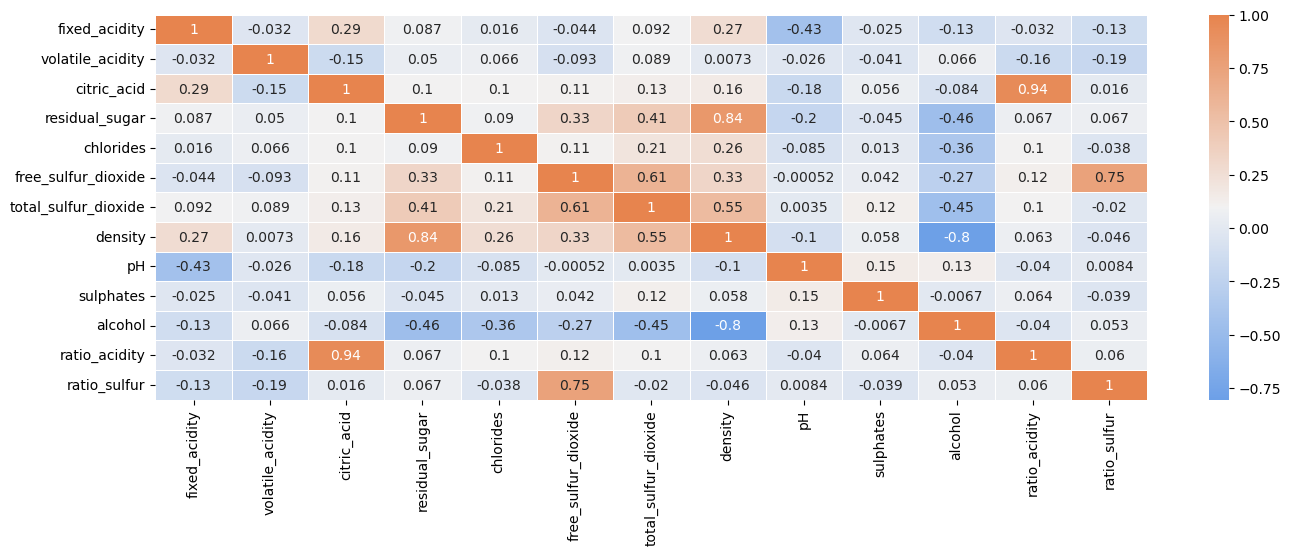

In [140]:
# Vamos a hacer un heatmap para visualizar mejor estas correlaciones

colors = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)

plt.figure(figsize = (16,5))
sns.heatmap(corr_x, linewidths= .5, annot= True,cmap= colors)

# Las correlaciones de la calidad que más me llaman la atención son densidad, alcohol y cloruros.

Correlaciones que podrian darme problemas de multicolinearidad:

- Alcohol y densidad
- Densidad y residual sugar 

### 3. Modelo de Machine Learning base

Inicialmente habia pensado tratar este ejercicio como un problema de regresión, ya que nos interesa predecir la calidad del vino en función de las variables fisico-químicas. Sin embargo, la variable dependiente (quality) es de tipo cualitativa (ordenada), por lo que mejor abordar esto como un problema de clasificación. 

Una primera aproximación que seguí fue discretizar la variable dependiente en 3 categorias (Bad, Normal, Good) porque habia muy pocos vinos con calificaciones de 3 y 9. En el EDA inicial vi que más o menos se podian distinguir las calidades de vino en funcion del alcohol, la densidad y los cloruros. Sin embargo, despues de hacer los modelos de Machine Learning, pienso que esta aproximación no es muy informativa. 

En este notebook aplico modelos de machine learning al dataset sin discretizar la variable dependiente.

### Preprocessing

In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [142]:
# Las variables estan en distintas magnitudes, hay que escalar
# Hay algunas variables que tienen valores de cero, no se puede aplicar box-cox
x_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,ratio_acidity,ratio_sulfur
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,6.856749,0.278019,0.334917,6.413947,0.045520,35.115345,138.205799,0.994031,3.186697,0.488958,10.508509,0.048911,0.254656
std,0.831653,0.099025,0.121902,4.975956,0.020973,16.277160,41.725829,0.002906,0.149808,0.114459,1.229951,0.017210,0.093322
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.220000,8.000000,0.000000,0.023622
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.080000,0.410000,9.500000,0.038961,0.190171
50%,6.800000,0.260000,0.320000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.046377,0.252475
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.055714,0.314607
max,14.200000,1.005000,1.660000,26.050000,0.346000,128.000000,344.000000,1.002950,3.820000,1.080000,14.200000,0.224324,0.710526


In [143]:
# Del EDA vimos que algunas variables no son normales, vamos a aplicar una transformacion
p = PowerTransformer(method='yeo-johnson')
scl = StandardScaler()

#train
x_train_pt = p.fit_transform(x_train)
x_train_final = scl.fit_transform(x_train_pt)

#test
x_test_pt = p.transform(x_test)
x_test_final = scl.transform(x_test_pt)

### Model training

Vamos a probar modelos sencillos

In [144]:
from sklearn.model_selection import cross_validate

Logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression

log_reg1 = LogisticRegression(random_state= 42, max_iter= 500, class_weight= "balanced")

log_reg1.fit(x_train_final, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [146]:
cv=pd.DataFrame(cross_validate(log_reg1, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,0.096640,0.002052,0.318374,0.333026
1,0.099360,0.002000,0.333579,0.312577
2,0.096060,0.002001,0.319430,0.329244
3,0.083434,0.001747,0.308319,0.327268
4,0.091426,0.002159,0.302811,0.329012


In [147]:
scores=pd.DataFrame(columns=["validation_metric_mean","validation_metric_std","training_metric_mean","training_metric_std"])
scores.loc["log_reg"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
log_reg,0.316502,0.011812,0.326225,0.007914


Linear support vector classification

In [148]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(max_iter= 4000, random_state= 42, class_weight= "balanced")
lsvc.fit(x_train_final, y_train)

c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', max_iter=4000, random_state=42)

In [149]:
cv=pd.DataFrame(cross_validate(lsvc, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
scores.loc["lsvc"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores

c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ganch\anaconda3\envs\machine\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
log_reg,0.316502,0.011812,0.326225,0.007914
lsvc,0.371761,0.017120,0.386485,0.006151


RBF support vector classification

In [150]:
from sklearn.svm import SVC

rbf_svc = SVC(kernel= "rbf", random_state= 42, class_weight= "balanced")

rbf_svc.fit(x_train_final, y_train)

SVC(class_weight='balanced', random_state=42)

In [151]:
cv=pd.DataFrame(cross_validate(rbf_svc, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
scores.loc["rbf_svc"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
log_reg,0.316502,0.011812,0.326225,0.007914
lsvc,0.371761,0.017120,0.386485,0.006151
rbf_svc,0.400877,0.013821,0.518122,0.005182


Sigmoid support vector classification

In [152]:
from sklearn.svm import SVC

sig_svc = SVC(kernel= "sigmoid", random_state= 42, class_weight= "balanced")
sig_svc.fit(x_train_final, y_train)

SVC(class_weight='balanced', kernel='sigmoid', random_state=42)

In [153]:
cv=pd.DataFrame(cross_validate(sig_svc, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
scores.loc["sig_svc"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
log_reg,0.316502,0.011812,0.326225,0.007914
lsvc,0.371761,0.017120,0.386485,0.006151
rbf_svc,0.400877,0.013821,0.518122,0.005182
sig_svc,0.196866,0.009376,0.188256,0.008430


Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

#Añadí el argumento min samples leaf porque se estaba overfitteando

rand_forest = RandomForestClassifier(random_state= 42, class_weight= "balanced_subsample", min_samples_leaf= 10)
rand_forest.fit(x_train_final, y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=10,
                       random_state=42)

In [155]:
cv=pd.DataFrame(cross_validate(rand_forest, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
scores.loc["rand_forest"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
log_reg,0.316502,0.011812,0.326225,0.007914
lsvc,0.371761,0.017120,0.386485,0.006151
rbf_svc,0.400877,0.013821,0.518122,0.005182
sig_svc,0.196866,0.009376,0.188256,0.008430
rand_forest,0.492196,0.018095,0.734436,0.005272


Probe estos modelos sencillos de ML probando varias cosas:
- Discretizando la variable quality en 3 categorias.
- Eliminando los outliers del train set antes de fittear los modelos de ML
- Probe con resample o SMOTE para equilibrar un poco los grupos

El mejor resultado me dio:
- Eliminar los vinos de 3 y 9 (Hay muy pocas muestras de cada uno de ellos)
- Utilizar el argumento class weights en los modelos de ML

Ahora vamos a probar algunos Ensembles y optimizarlos

### Prueba de boosters

AdaBoost

In [156]:
# Cambie el parametro del adabooster por un SVC, porque fue uno de los que mejor me funciono antes

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


estimator = DecisionTreeClassifier(max_depth= 1)

ada_clf_tree = AdaBoostClassifier(estimator = estimator,
                             n_estimators = 200,
                             learning_rate = 0.5,
                             random_state = 42)

ada_clf_tree.fit(x_train_final, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [157]:
cv=pd.DataFrame(cross_validate(ada_clf_tree, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,1.547050,0.079740,0.316079,0.340352
1,1.232659,0.065929,0.364400,0.328791
2,1.215885,0.078729,0.313616,0.356553
3,1.235691,0.079309,0.313091,0.353134
4,1.241117,0.075137,0.289066,0.308181


In [158]:
scores_booster=pd.DataFrame(columns=["validation_metric_mean","validation_metric_std","training_metric_mean","training_metric_std"])
scores_booster.loc["ada_boost_tree"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_booster

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
ada_boost_tree,0.319251,0.027519,0.337402,0.019691


LightGBM

In [159]:
import lightgbm as lgbm

lgbm_clas = lgbm.LGBMClassifier(objective="multiclass",
                                max_depth=2,
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 random_state=42)

lgbm_clas.fit(x_train_final, y_train)

LGBMClassifier(max_depth=2, objective='multiclass', random_state=42)

In [160]:
cv=pd.DataFrame(cross_validate(lgbm_clas, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,0.106628,0.009518,0.442489,0.548906
1,0.075218,0.014526,0.399415,0.512720
2,0.092387,0.015640,0.410363,0.542105
3,0.078550,0.000000,0.382745,0.513217
4,0.094297,0.000000,0.408649,0.529232


In [161]:
scores_booster.loc["light_gbm"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_booster

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
ada_boost_tree,0.319251,0.027519,0.337402,0.019691
light_gbm,0.408732,0.021819,0.529236,0.016446


XGBoost

In [162]:
import xgboost
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_xg = encoder.fit_transform(y_train)

xgb_clas = xgboost.XGBRFClassifier(random_state=42)

xgb_clas.fit(x_train_final, y_train_xg)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, random_state=42,
                reg_alpha=None, ...)

In [163]:
cv=pd.DataFrame(cross_validate(xgb_clas, x_train_final, y_train_xg, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,1.042743,0.015734,0.392875,0.626918
1,1.151577,0.015013,0.448639,0.609653
2,0.978168,0.015013,0.413490,0.625276
3,0.945661,0.000000,0.373856,0.594695
4,0.969611,0.000000,0.402653,0.616806


In [164]:
scores_booster.loc["xg_boost"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_booster

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
ada_boost_tree,0.319251,0.027519,0.337402,0.019691
light_gbm,0.408732,0.021819,0.529236,0.016446
xg_boost,0.406303,0.027796,0.614670,0.013146


Catboost

In [165]:
from catboost import CatBoostClassifier as CTC

ctc=CTC(verbose=0, max_depth = 10, task_type= "GPU", devices='0:1')

ctc.fit(x_train_final, y_train)

In [166]:
cv=pd.DataFrame(cross_validate(ctc, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,33.501535,0.013974,0.521988,1.0
1,33.452793,0.020033,0.602283,1.0
2,34.277659,0.024100,0.537510,1.0
3,34.343535,0.014482,0.527196,1.0
4,33.790160,0.026420,0.586037,1.0


In [167]:
scores_booster.loc["cat_boost"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_booster

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
ada_boost_tree,0.319251,0.027519,0.337402,0.019691
light_gbm,0.408732,0.021819,0.529236,0.016446
xg_boost,0.406303,0.027796,0.614670,0.013146
cat_boost,0.555003,0.036632,1.000000,0.000000


Los modelos con mejores resultados en el crossvalidation son el Random Forest y el CatBoost. Vamos a probar a optimizar estos modelos. 
Tambien vamos a probar a optimizar el RBF SVM, ya que en el artículo academico de donde saque estos datos, los autores usan un modelo de SVM solo que con que con otro kernel (que no esta en la libreria de sklearn)

### Pipeline

In [168]:
# En este pipeline probamos el RBF SVM y Random Forest. 
# El CatBoost lo optimizo en otro pipeline.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[
    ('classifier', LinearRegression()) #este modelo de linear regression nunca llega a usarse, 
    #es solo un placeholder para definir el pipeline dado que para definirse necesita contener un estimador
])

rbf_svc_params = {
    'classifier': [SVC()], #aqui estas indicando que en classifier ponga este modelo
    'classifier__C': [0.1, 1, 5, 15], #y aqui los parametros para el modelo 
    'classifier__kernel': ["rbf"],
    'classifier__class_weight': [None, 'balanced']
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 15, 20, 30],
    'classifier__class_weight': [None, "balanced", "balanced_subsample"]
}

search_space = [
    rbf_svc_params,
    random_forest_params
]

clf = GridSearchCV(estimator = pipe,
                   scoring= "f1_macro",
                  param_grid = search_space,
                  verbose= 1,
                  n_jobs= -1,
                  return_train_score= True,
                  cv = 5)

clf.fit(x_train_final, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.1, 1, 5, 15],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__kernel': ['rbf']},
                         {'classifier': [RandomForestClassifier(class_weight='balanced_subsample',
                                                                max_depth=20,
                                                                n_estimators=200)],
                          'classifier__class_weight': [None, 'balanced',
                                                       'balanced_subsample'],
                          'classifier__max_depth': [3, 5, 7, 15, 20, 30],
                          'classifier__n_estimators': [50, 100, 200, 300]}],
             return_train_score=True, scoring='f1_macro', verbose=1)

El Random Forest se comporto mejor que el RBF Support Vector Machine. Entre estos dos, me quedo con Random Forest

In [169]:
clf.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=20, n_estimators=200))])

In [170]:
clf.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                        n_estimators=200),
 'classifier__class_weight': 'balanced_subsample',
 'classifier__max_depth': 20,
 'classifier__n_estimators': 200}

In [171]:
clf.best_score_

0.5619038929191136

In [172]:
# Vamos a mirar el cross validation del mejor modelo del pipeline, para comprobar que no este haciendo overfitting

best_random_forest = clf.best_estimator_

cv=pd.DataFrame(cross_validate(best_random_forest, x_train_final, y_train, cv=10,return_train_score=True, scoring="f1_macro"))

cv
# Vemos que esta haciendo algo de overfitting, voy a intentar regularizarlo un poco

,fit_time,score_time,test_score,train_score
0,2.811401,0.042522,0.559668,1.0
1,3.031472,0.049272,0.478965,1.0
2,3.033719,0.062786,0.608744,1.0
3,3.269888,0.056659,0.579113,1.0
4,3.520187,0.054837,0.627964,1.0
5,3.142157,0.039739,0.612014,1.0
6,2.745834,0.042293,0.504362,1.0
7,2.531955,0.039406,0.572065,1.0
8,2.145315,0.035646,0.501029,1.0
9,2.192691,0.026798,0.679734,1.0


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [174]:
param_grid = {'n_estimators': [300], 
              'max_depth': [15], 
              'class_weight': ["balanced"],
              'max_features': [2, "sqrt", "log2"],
              'min_samples_split':[2, 5, 10, 20, 25, 30],
              'min_samples_leaf': [2, 5, 10, 20, 25, 30],
              'random_state' : [5]}


clf_optimized = GridSearchCV(   estimator = RandomForestClassifier(),
                                scoring= "f1_macro",
                                param_grid = param_grid,
                                verbose= 1,
                                n_jobs= -1,
                                return_train_score= True,
                                cv = 5)

clf_optimized.fit(x_train_final, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [15],
                         'max_features': [2, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10, 20, 25, 30],
                         'min_samples_split': [2, 5, 10, 20, 25, 30],
                         'n_estimators': [300], 'random_state': [5]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [175]:
# Mejoro una decima más
clf_optimized.best_score_

0.5756379395362807

In [176]:
clf_optimized.best_params_

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300,
 'random_state': 5}

In [177]:
optimized_random_forest= clf_optimized.best_estimator_

In [178]:
cv=pd.DataFrame(cross_validate(optimized_random_forest, x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

,fit_time,score_time,test_score,train_score
0,2.952616,0.075494,0.544706,0.937996
1,2.429180,0.079012,0.604192,0.942153
2,2.323448,0.087977,0.577725,0.941805
3,2.457968,0.073648,0.546260,0.936777
4,2.302435,0.065912,0.605307,0.940551


In [179]:
scores_optimized=pd.DataFrame(columns=["validation_metric_mean","validation_metric_std","training_metric_mean","training_metric_std"])
scores_optimized.loc["opt random forest"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_optimized

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
opt random forest,0.575638,0.029664,0.939856,0.002372


Finalmente vamos a optimizar el catboost, que fue otro de los que mejor funcionó en las pruebas

In [87]:
param_grid = {  'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 5, 10]}

grid_search_result = CTC(loss_function = "MultiClass", task_type= "GPU", devices='0:1').grid_search(param_grid= param_grid, 
                                       X=x_train_final, 
                                       y=y_train,
                                       cv= 5)


0:	learn: 1.5791183	test: 1.5804108	best: 1.5804108 (0)	total: 5.33ms	remaining: 5.33s
1:	learn: 1.5512160	test: 1.5534735	best: 1.5534735 (1)	total: 8.12ms	remaining: 4.05s
2:	learn: 1.5254007	test: 1.5285859	best: 1.5285859 (2)	total: 10.7ms	remaining: 3.55s
3:	learn: 1.5016215	test: 1.5054933	best: 1.5054933 (3)	total: 13.5ms	remaining: 3.37s
4:	learn: 1.4792553	test: 1.4839083	best: 1.4839083 (4)	total: 16ms	remaining: 3.19s
5:	learn: 1.4582550	test: 1.4634996	best: 1.4634996 (5)	total: 18.4ms	remaining: 3.06s
6:	learn: 1.4387216	test: 1.4441536	best: 1.4441536 (6)	total: 22.1ms	remaining: 3.14s
7:	learn: 1.4201227	test: 1.4262010	best: 1.4262010 (7)	total: 24.9ms	remaining: 3.09s
8:	learn: 1.4026686	test: 1.4101894	best: 1.4101894 (8)	total: 27.9ms	remaining: 3.07s
9:	learn: 1.3864189	test: 1.3944297	best: 1.3944297 (9)	total: 30.7ms	remaining: 3.04s
10:	learn: 1.3711108	test: 1.3798658	best: 1.3798658 (10)	total: 33.5ms	remaining: 3.02s
11:	learn: 1.3560473	test: 1.3661616	best: 

In [88]:
grid_search_result['params']

{'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [89]:
#Vamos a hacer un crossvalidation con este modelo de catboos

cv=pd.DataFrame(cross_validate(CTC(depth= 10, l2_leaf_reg = 1, learning_rate= 0.03, loss_function = "MultiClass", task_type= "GPU", devices='0:1'), x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

0:	learn: 1.5784333	total: 25.2ms	remaining: 25.2s
1:	learn: 1.5489234	total: 48.5ms	remaining: 24.2s
2:	learn: 1.5204185	total: 72ms	remaining: 23.9s
3:	learn: 1.4928233	total: 95.2ms	remaining: 23.7s
4:	learn: 1.4670112	total: 119ms	remaining: 23.7s
5:	learn: 1.4420303	total: 143ms	remaining: 23.6s
6:	learn: 1.4185468	total: 166ms	remaining: 23.5s
7:	learn: 1.3966113	total: 190ms	remaining: 23.5s
8:	learn: 1.3747975	total: 214ms	remaining: 23.6s
9:	learn: 1.3536687	total: 243ms	remaining: 24.1s
10:	learn: 1.3333083	total: 267ms	remaining: 24s
11:	learn: 1.3136197	total: 292ms	remaining: 24.1s
12:	learn: 1.2953210	total: 317ms	remaining: 24s
13:	learn: 1.2769408	total: 343ms	remaining: 24.1s
14:	learn: 1.2599663	total: 367ms	remaining: 24.1s
15:	learn: 1.2433138	total: 394ms	remaining: 24.2s
16:	learn: 1.2272218	total: 418ms	remaining: 24.2s
17:	learn: 1.2111637	total: 443ms	remaining: 24.2s
18:	learn: 1.1957769	total: 466ms	remaining: 24.1s
19:	learn: 1.1810994	total: 492ms	remaining

,fit_time,score_time,test_score,train_score
0,22.761249,0.010001,0.501573,1.0
1,22.667107,0.009998,0.587025,1.0
2,22.627116,0.009005,0.543590,1.0
3,23.325846,0.008002,0.557255,1.0
4,22.156115,0.008003,0.593292,1.0


In [ ]:
# El Catboost esta con overfitting, voy a tratar de regularizarlo un poco más usando el parametro random_strenght

param_grid = {  'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'random_strength': [1, 5, 10],
                'l2_leaf_reg': [1, 5, 10]}

cat_boost_opt = CTC(loss_function = "MultiClass").grid_search(param_grid= param_grid, 
                                       X=x_train_final, 
                                       y=y_train,
                                       cv= 5)

In [95]:
cat_boost_opt["params"]

{'random_strength': 10, 'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [100]:
cv=pd.DataFrame(cross_validate(CTC(random_strength= 100, depth= 10, l2_leaf_reg = 1, learning_rate= 0.03, loss_function = "MultiClass", task_type= "GPU", devices='0:1'), x_train_final, y_train, cv=5,return_train_score=True, scoring="f1_macro"))
cv

0:	learn: 1.5848261	total: 2.59ms	remaining: 2.59s
1:	learn: 1.5618331	total: 4.59ms	remaining: 2.29s
2:	learn: 1.5453732	total: 5.96ms	remaining: 1.98s
3:	learn: 1.5299567	total: 7.03ms	remaining: 1.75s
4:	learn: 1.5154928	total: 8.5ms	remaining: 1.69s
5:	learn: 1.5019027	total: 10.5ms	remaining: 1.74s
6:	learn: 1.4891157	total: 11.7ms	remaining: 1.66s
7:	learn: 1.4770704	total: 12.9ms	remaining: 1.6s
8:	learn: 1.4657103	total: 14.1ms	remaining: 1.55s
9:	learn: 1.4549862	total: 15.2ms	remaining: 1.5s
10:	learn: 1.4448529	total: 16.2ms	remaining: 1.46s
11:	learn: 1.4352698	total: 17.2ms	remaining: 1.42s
12:	learn: 1.4213405	total: 18.9ms	remaining: 1.44s
13:	learn: 1.4127498	total: 19.9ms	remaining: 1.4s
14:	learn: 1.4046083	total: 21ms	remaining: 1.38s
15:	learn: 1.3968879	total: 22ms	remaining: 1.35s
16:	learn: 1.3895632	total: 23ms	remaining: 1.33s
17:	learn: 1.3826104	total: 24.1ms	remaining: 1.31s
18:	learn: 1.3760076	total: 25.8ms	remaining: 1.33s
19:	learn: 1.3652231	total: 27.3

,fit_time,score_time,test_score,train_score
0,15.622133,0.009004,0.522901,0.999216
1,15.083893,0.007994,0.600755,0.999502
2,15.113006,0.007999,0.550483,0.999286
3,14.849237,0.007999,0.527266,0.999287
4,14.993598,0.006999,0.593894,0.998719


In [102]:
scores_optimized.loc["opt catboost"] = [ cv["test_score"].mean(), cv["test_score"].std(),cv["train_score"].mean(), cv["train_score"].std()]
scores_optimized

,validation_metric_mean,validation_metric_std,training_metric_mean,training_metric_std
opt random forest,0.575638,0.029664,0.939856,0.002372
opt catboost,0.559060,0.036551,0.999202,0.000291


### Conclusion de los modelos 

Me quedo con el Random Forest para el test final

## 4. Evaluacion del modelo

In [180]:
predictions = optimized_random_forest.predict(x_test_final)

from sklearn.metrics import f1_score

score = f1_score(y_test, predictions, average = "macro")

score*100

56.74720644510549

In [201]:
# La matriz de confusion la normalizé con respecto a los true values (que vendria a ser algo asi como el recall) para ver la proporcion de vinos que clasifiqué
# correctamente en cada categoria
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, predictions, normalize= 'true')

print(cm)

[[0.27272727 0.42424242 0.27272727 0.03030303 0.        ]
 [0.03092784 0.68041237 0.27147766 0.01718213 0.        ]
 [0.00227273 0.17954545 0.66363636 0.15       0.00454545]
 [0.00568182 0.01704545 0.28977273 0.67613636 0.01136364]
 [0.         0.         0.28571429 0.31428571 0.4       ]]


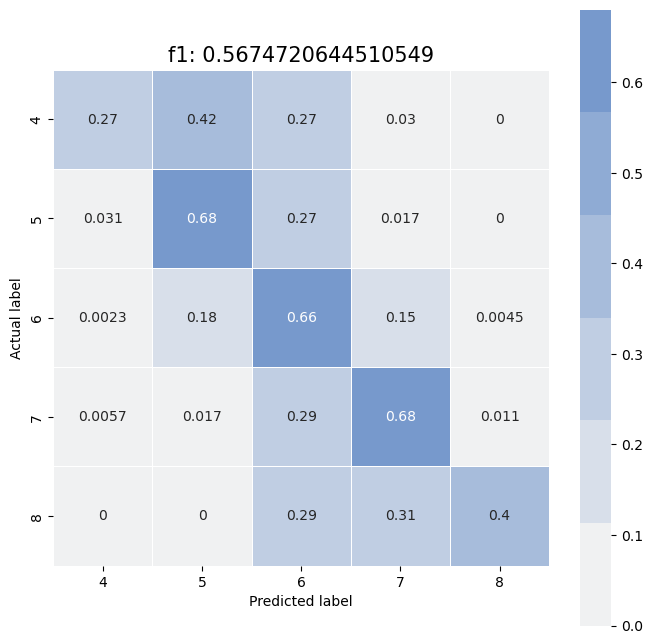

In [202]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = sns.light_palette("#79C"),
            xticklabels= ["4", "5", "6", "7", "8"],
            yticklabels = ["4", "5", "6", "7", "8"])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'f1: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [183]:
# Vemos que el modelo predice peor los vinos con calificacion de 4
f1_score(y_test, predictions, average = None)

array([0.33962264, 0.67692308, 0.66288309, 0.62962963, 0.52830189])

In [195]:
f1_score_class = pd.DataFrame(f1_score(y_test, predictions, average = None).reshape(1,-1), 
                              columns = ['4', '5', '6', '7', '8'],
                              index= ["f1"])

f1_score_class

,4,5,6,7,8
f1,0.339623,0.676923,0.662883,0.62963,0.528302


In [185]:
from sklearn.metrics import precision_score

precision_score(y_test, predictions, average= "macro")

0.630497519139669

In [196]:
# La mayor precision esta en los vinos de calificacion 8, aunque el recall es bajo, por eso el f1 score es mucho mas bajo que la precision.
from sklearn.metrics import precision_score

precision_class = pd.DataFrame(precision_score(y_test, predictions, average = None).reshape(1,-1), 
                               columns = ['4', '5', '6', '7', '8'],
                               index= ["precision"])

precision_class

,4,5,6,7,8
precision,0.45,0.673469,0.662132,0.589109,0.777778


In [198]:
final_summary = pd.concat([precision_class, f1_score_class], axis= 0)

final_summary

,4,5,6,7,8
precision,0.450000,0.673469,0.662132,0.589109,0.777778
f1,0.339623,0.676923,0.662883,0.629630,0.528302


### Feature importance

In [128]:
# Como usamos el random forest, podemos utilizar el atributo feature importance
features = pd.DataFrame({"feature": x_train.columns, "score":optimized_random_forest.feature_importances_})

features.sort_values(by = "score", ascending= False, inplace= True)

Text(0, 0.5, 'Features')

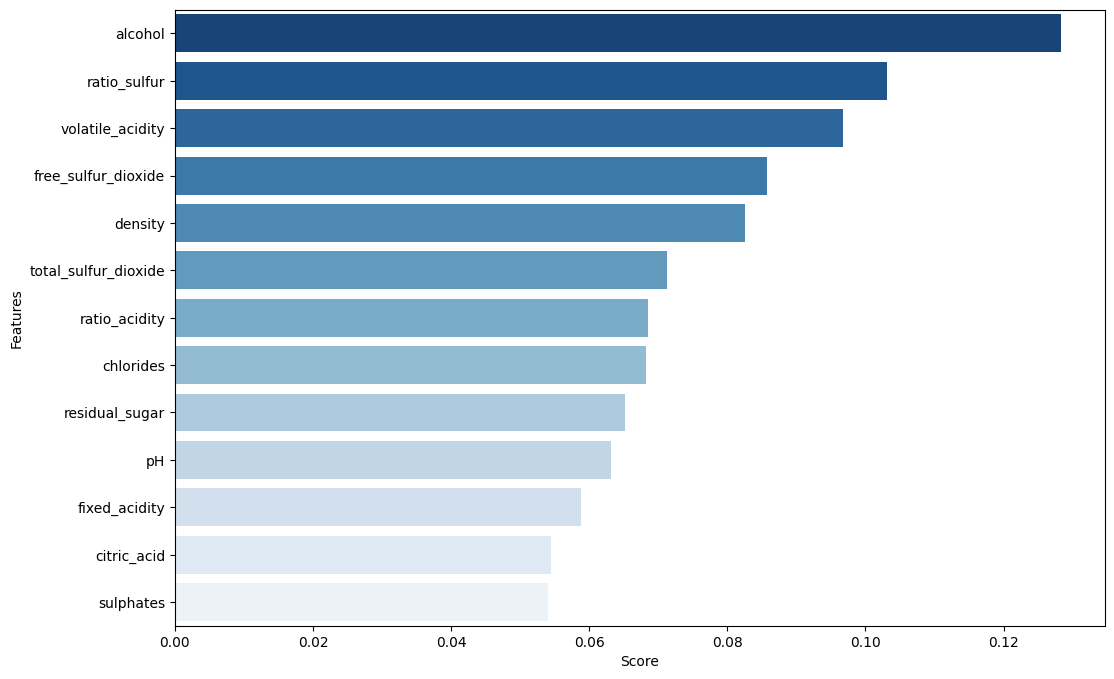

In [150]:
sns.barplot(features, x = "score", y = "feature", palette=sns.color_palette("Blues_r", len(features)))
plt.xlabel('Score')
plt.ylabel('Features')